In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
file_path = r"C:\Users\Lenovo\Documents\Cursos\DataAnalysis-IronHack\Week5\Day1\lab-eda-univariate\amz_uk_price_prediction_dataset.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
display(df.head())

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [8]:
best_seller_proportion = df.groupby('category')['isBestSeller'].mean()

# Step 2: Sort the categories by proportion in descending order
sorted_proportion = best_seller_proportion.sort_values(ascending=False)

# Convert to DataFrame for better display if needed
sorted_proportion_df = sorted_proportion.reset_index(name='Best Seller Proportion')

# Display the results
sorted_proportion_df.head()

,category,Best Seller Proportion
0,Grocery,0.058135
1,Smart Home Security & Lighting,0.057692
2,Health & Personal Care,0.057686
3,Mobile Phone Accessories,0.042471
4,Power & Hand Tools,0.035339


In [9]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value, expected_freq

(np.float64(36540.20270061387),
 np.float64(0.0),
 array([[2.47190130e+02, 8.09870149e-01],
        [4.05371878e+03, 1.32812173e+01],
        [2.49183599e+02, 8.16401360e-01],
        [1.69145827e+03, 5.54173243e+00],
        [2.53170536e+02, 8.29463782e-01],
        [8.50214439e+03, 2.78556144e+01],
        [1.06650580e+02, 3.49419782e-01],
        [2.57157474e+02, 8.42526204e-01],
        [9.51781673e+03, 3.11832664e+01],
        [1.50008526e+04, 4.91473619e+01],
        [9.32544700e+03, 3.05530045e+01],
        [2.38219520e+02, 7.80479700e-01],
        [3.22941944e+03, 1.05805616e+01],
        [9.44704859e+03, 3.09514084e+01],
        [6.68808779e+03, 2.19122125e+01],
        [5.26275760e+02, 1.72423967e+00],
        [1.90296531e+04, 6.23469391e+01],
        [2.77191835e+03, 9.08164873e+00],
        [2.53170536e+02, 8.29463782e-01],
        [4.04674164e+02, 1.32583581e+00],
        [1.92489346e+04, 6.30653723e+01],
        [3.10482764e+03, 1.01723609e+01],
        [2.04330551e+02, 6

In [12]:
pd.DataFrame(expected_freq, columns=df['isBestSeller'].unique(), index=crosstab_result.index)

,False,True
category,,
3D Printers,247.190130,0.809870
3D Printing & Scanning,4053.718783,13.281217
Abrasive & Finishing Products,249.183599,0.816401
Action Cameras,1691.458268,5.541732
Adapters,253.170536,0.829464
...,...,...
Wind Instruments,249.183599,0.816401
Window Treatments,238.219520,0.780480
Women,17713.963660,58.036340


In [13]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

In [ ]:
#The Cramér's V value of 0.122 suggests a weak association between the two variables.

In [17]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True);

In [27]:
sns.countplot(data=df, x='category', hue='isBestSeller');

In [22]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [23]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)

Series([], Name: price, dtype: float64)


In [24]:
df2 = df[~outliers]


In [25]:
df2.shape

(2443651, 0)

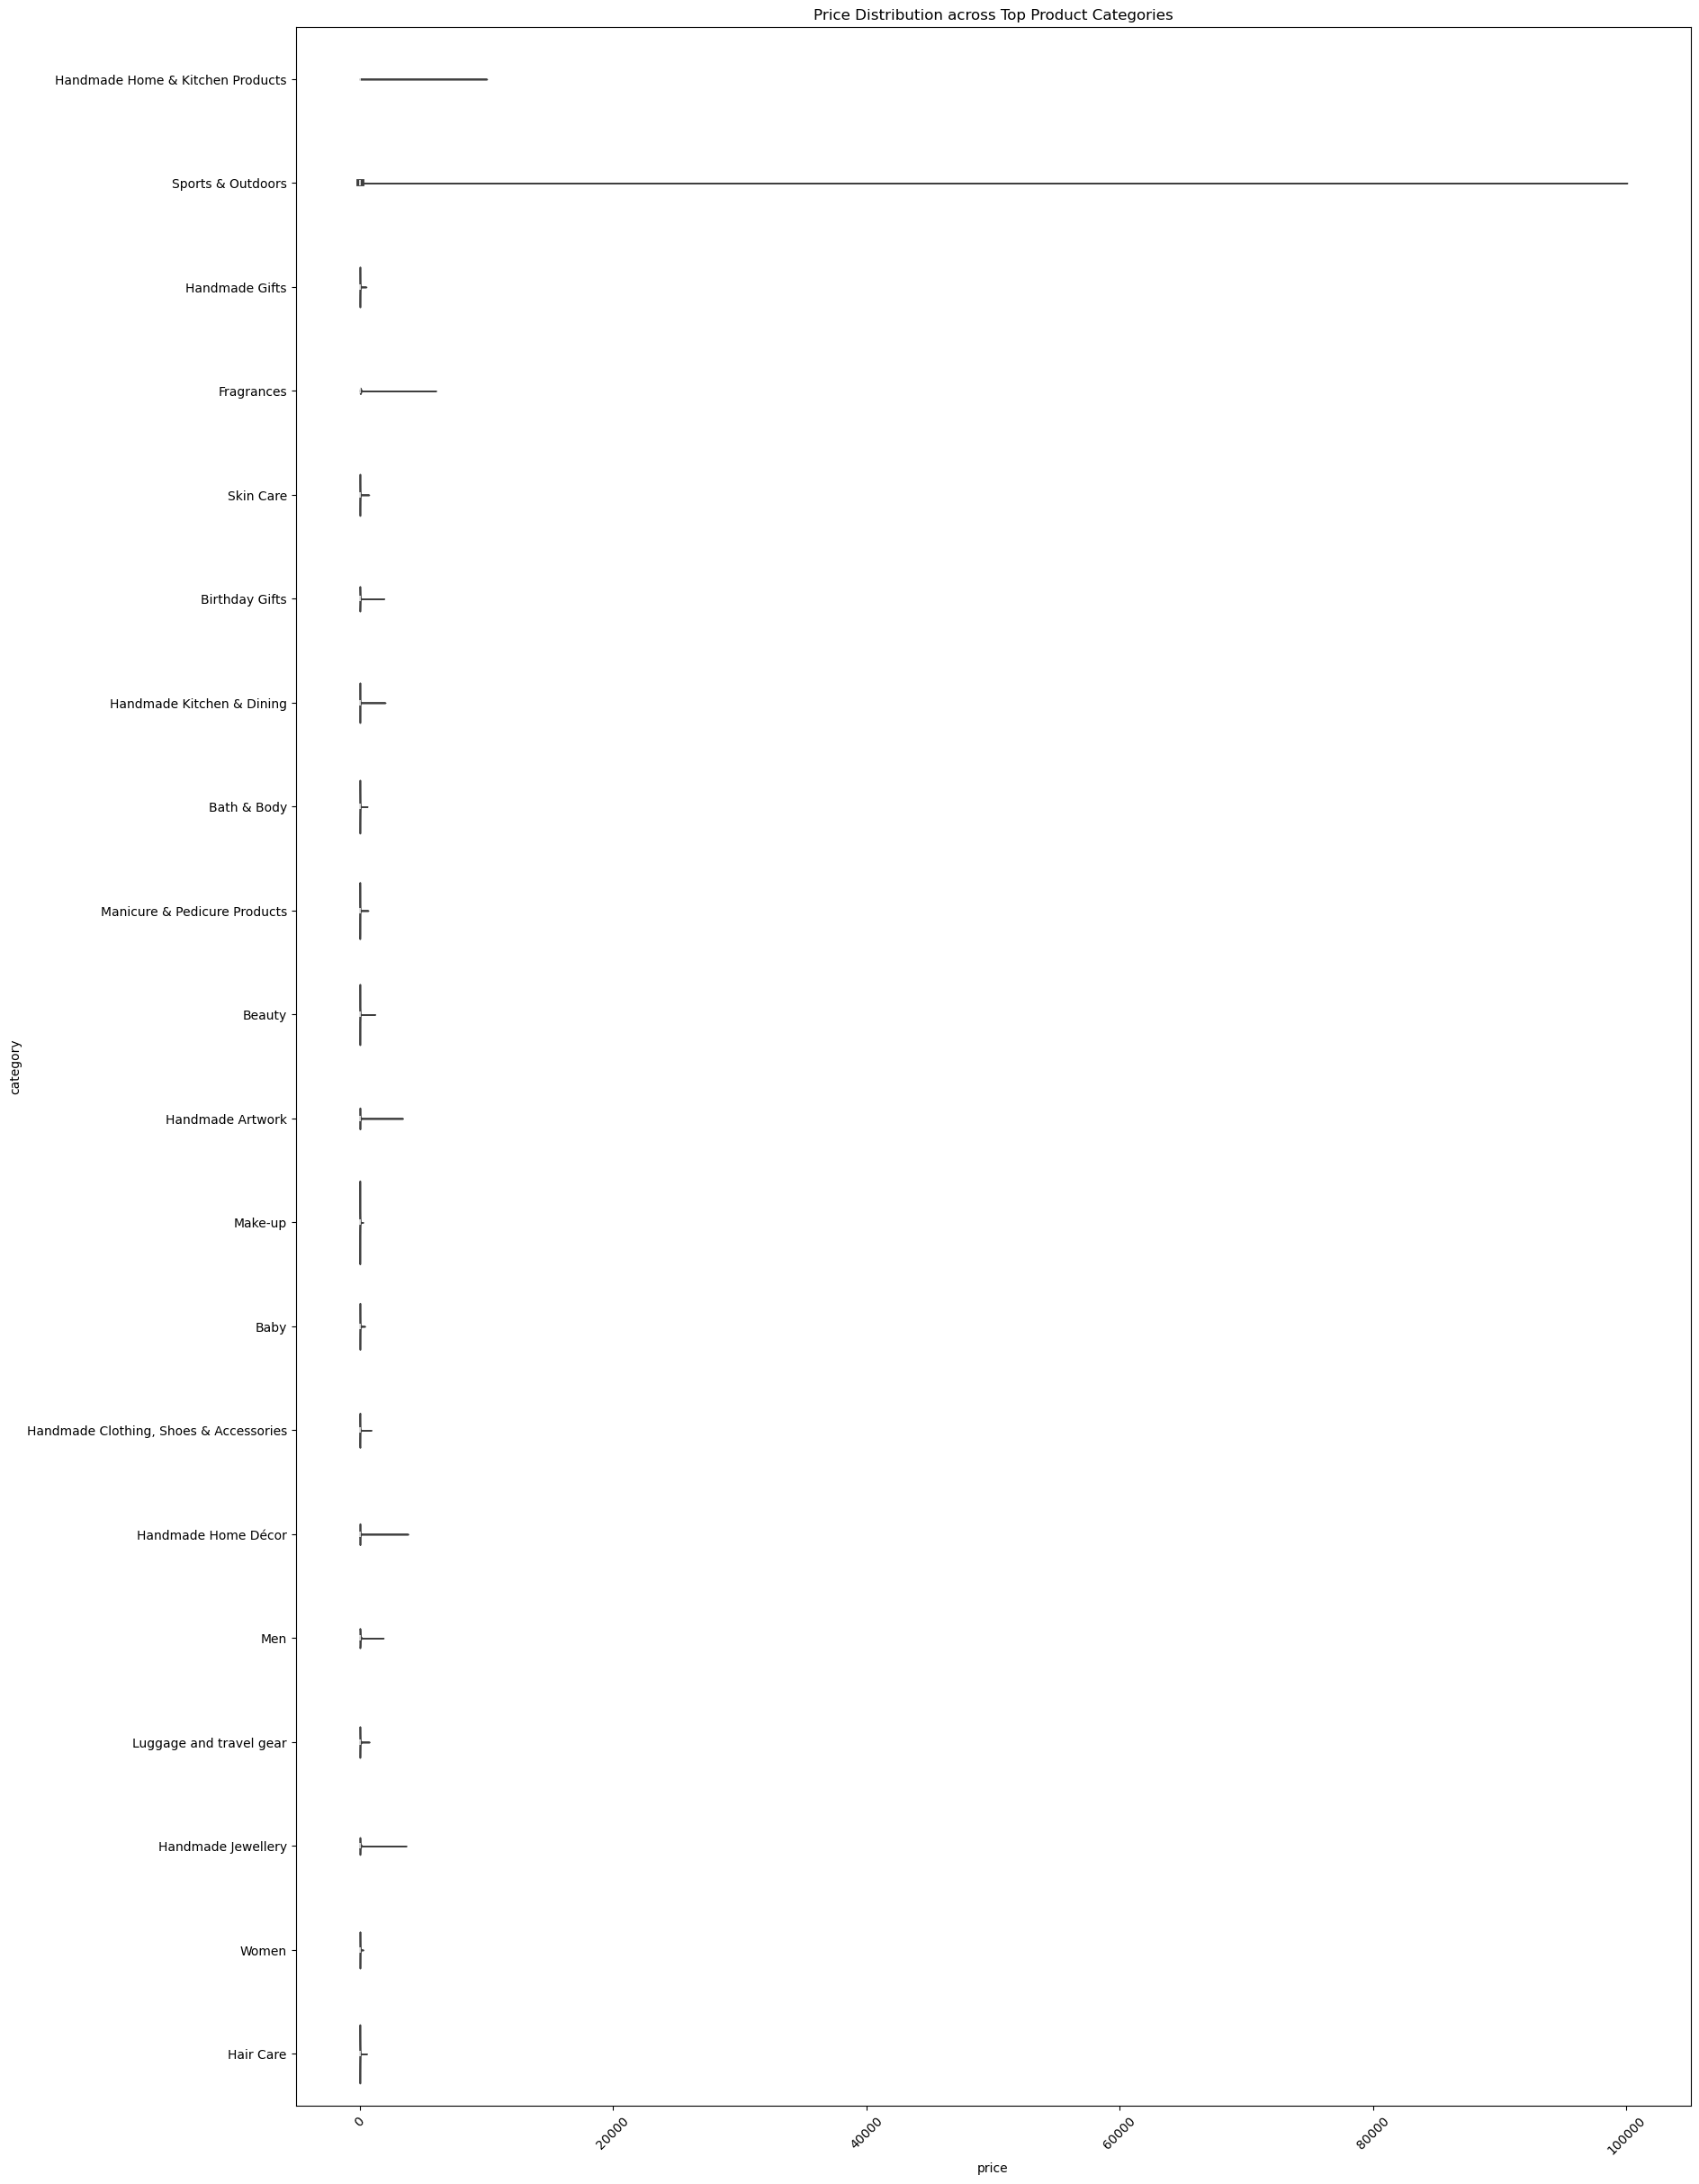

In [45]:
top_categories = df['category'].value_counts().nlargest(20).index
df_top = df[df['category'].isin(top_categories)]

# Create a violin plot for the top categories
plt.figure(figsize=(20, 30))
sns.violinplot(x='price', y='category', data=df_top)
plt.title('Price Distribution across Top Product Categories')
plt.xticks(rotation=45)
plt.show()

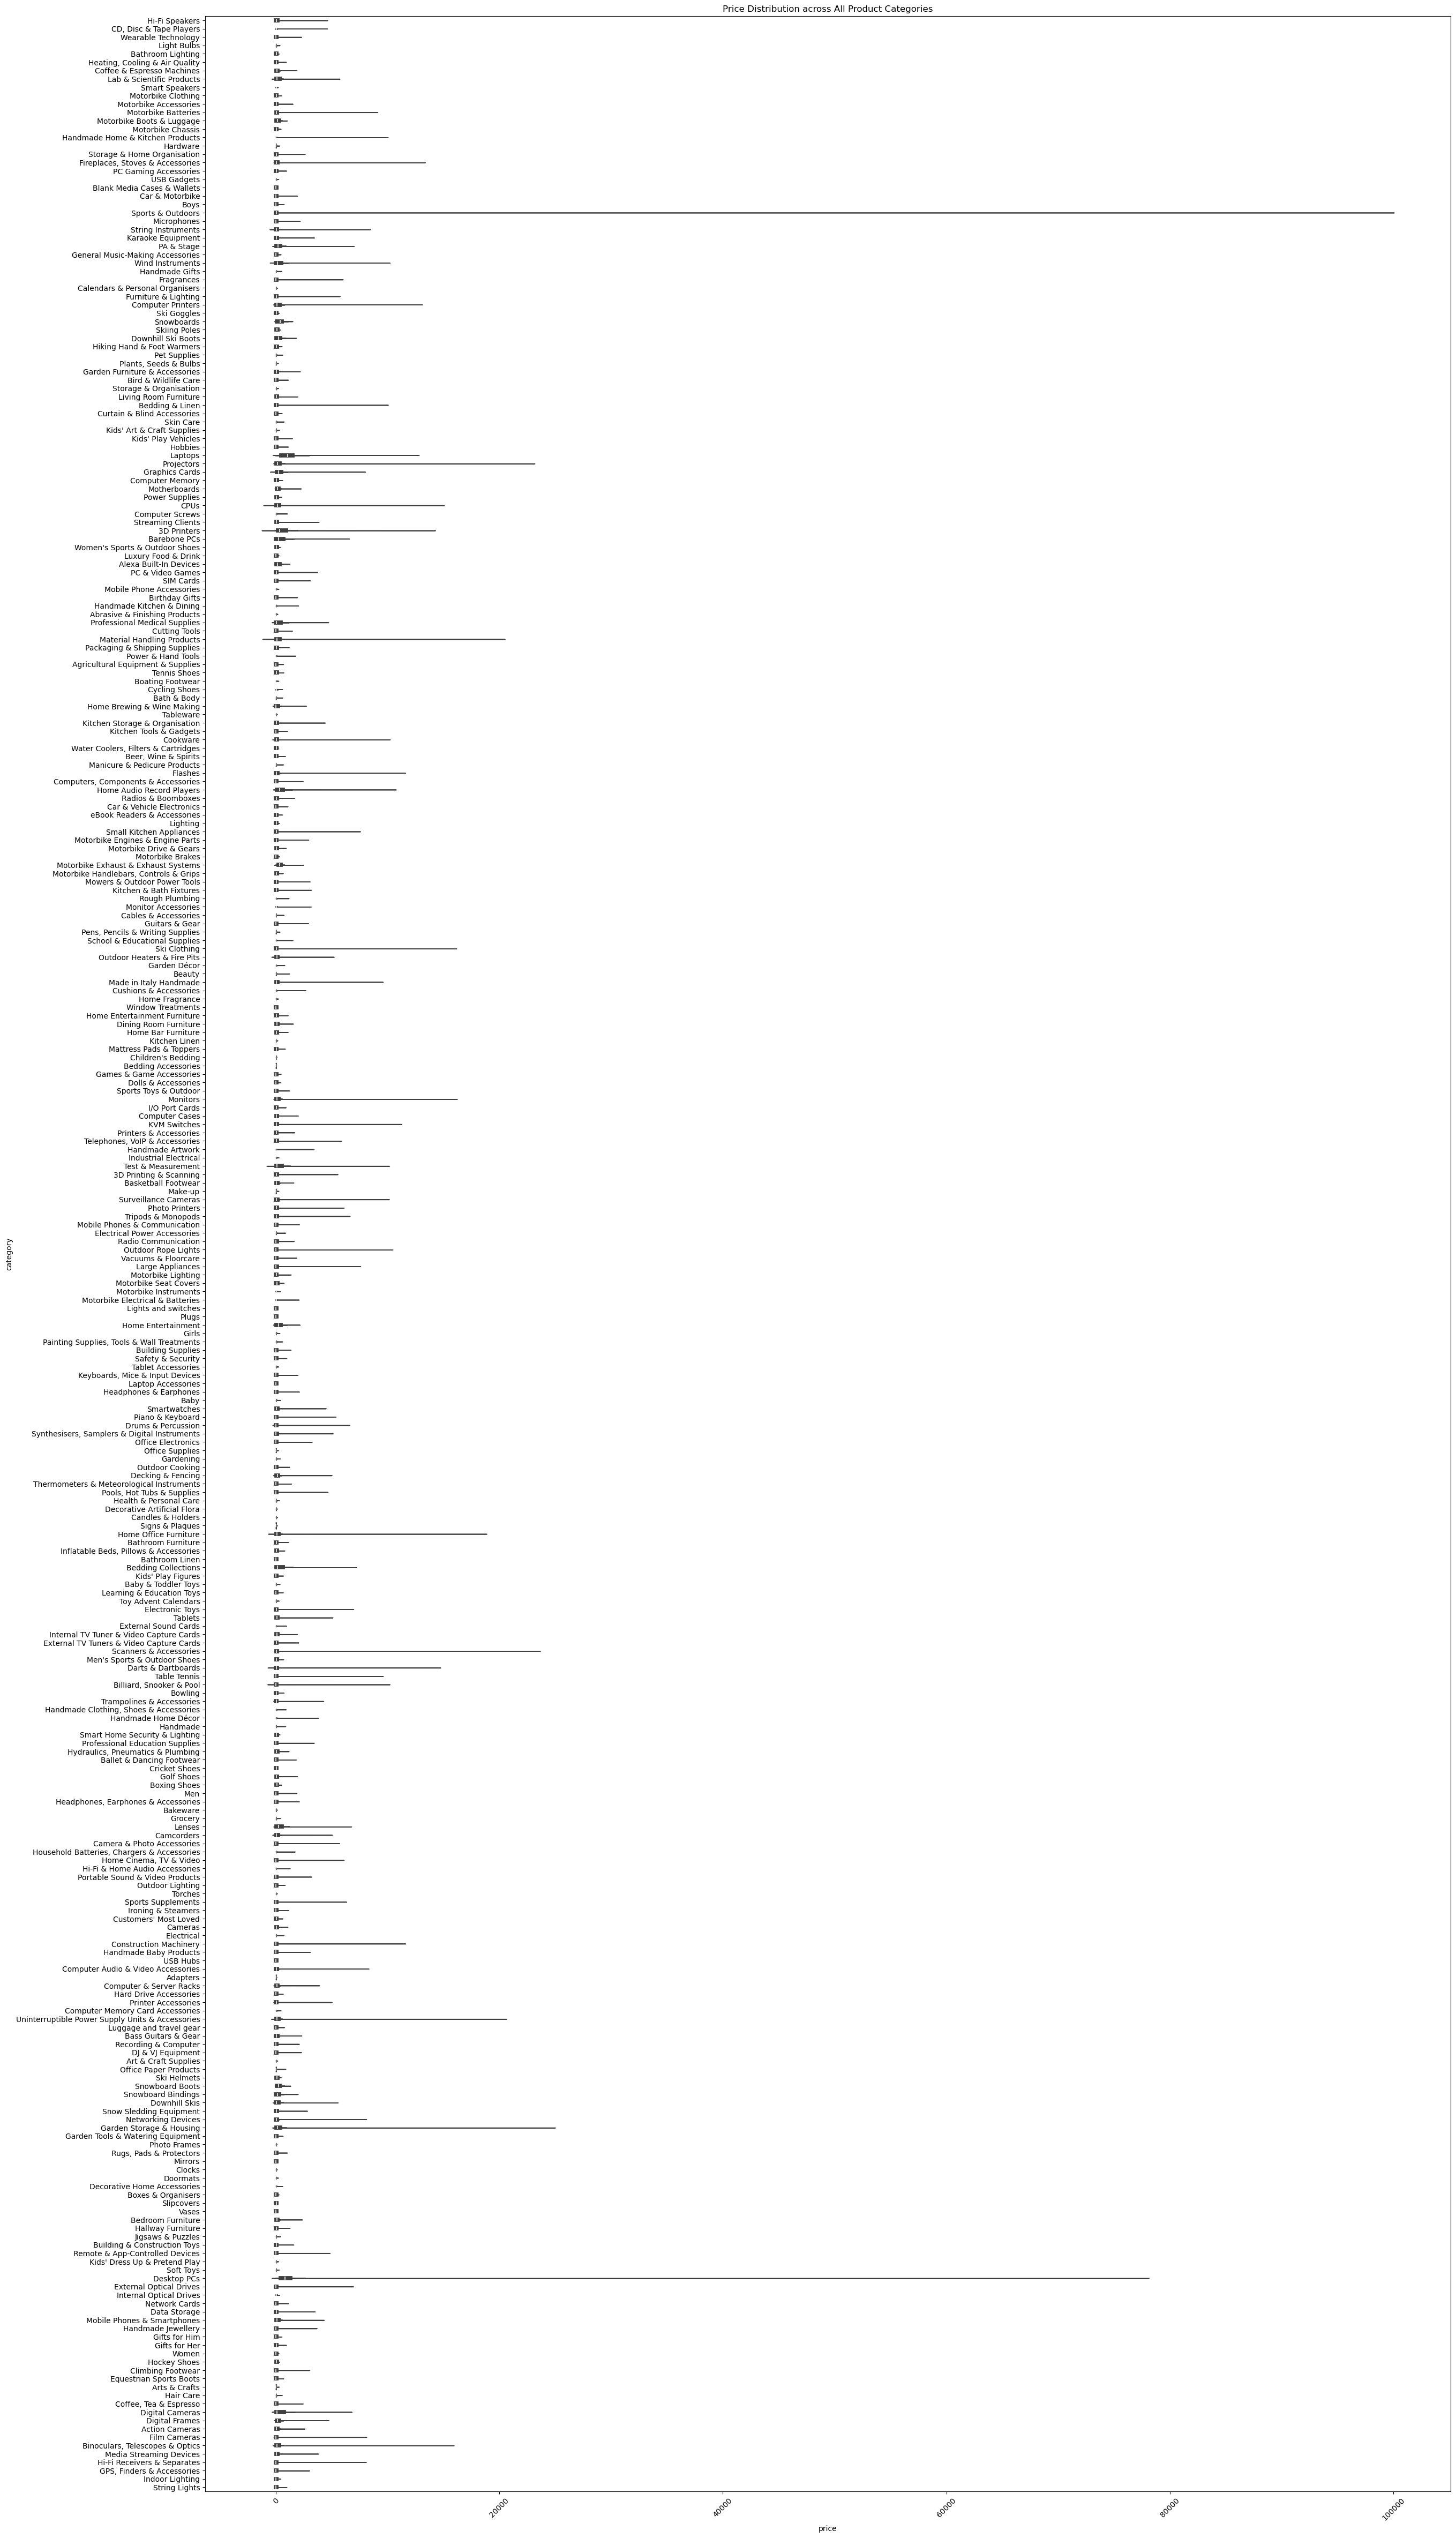

In [39]:
plt.figure(figsize=(30, 60))
sns.violinplot(x='price', y='category', data=df)
plt.title('Price Distribution across All Product Categories')
plt.xticks(rotation=45)
plt.show()

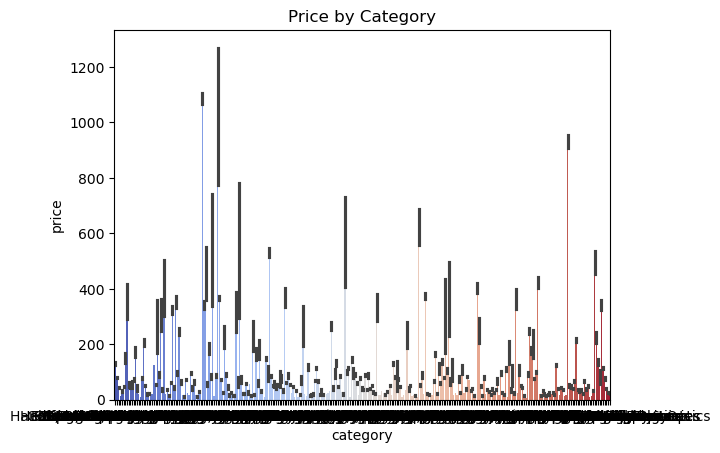

In [49]:
sns.barplot(data=df, x='category', y='price', palette="coolwarm", hue='category', legend=False)
plt.title('Price by Category')
plt.show()

In [50]:
top_categories2 = df['category'].value_counts().nlargest(10).index

# Filter df to include only the top categories by count
df_top = df[df['category'].isin(top_categories2)]

# Calculate the average price per category
avg_price = df_top.groupby('category')['price'].mean().sort_values(ascending=False)

<Figure size 1000x600 with 0 Axes>

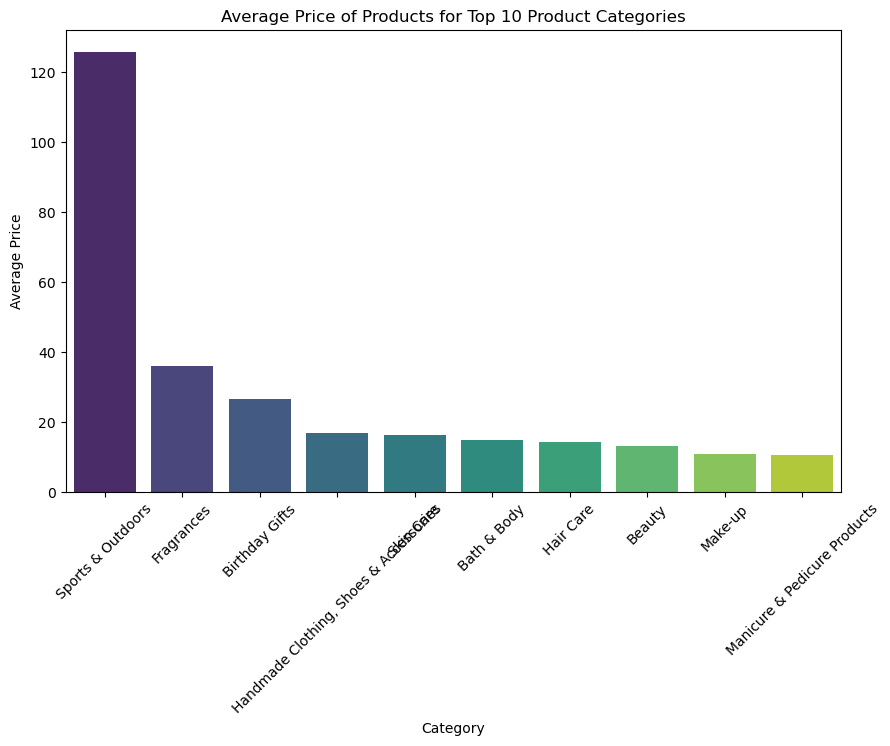

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis', hue=avg_price.index, legend=False)
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [54]:
overall_avg_price = df.groupby('category')['price'].mean().sort_values(ascending=False)

# Identify the category with the highest average price
highest_avg_price_category = overall_avg_price.idxmax()
highest_avg_price_value = overall_avg_price.max()

print(f'The category with the highest average price is {highest_avg_price_category} with an average price of {highest_avg_price_value:.2f}.')





The category with the highest average price is Laptops with an average price of 1087.99.


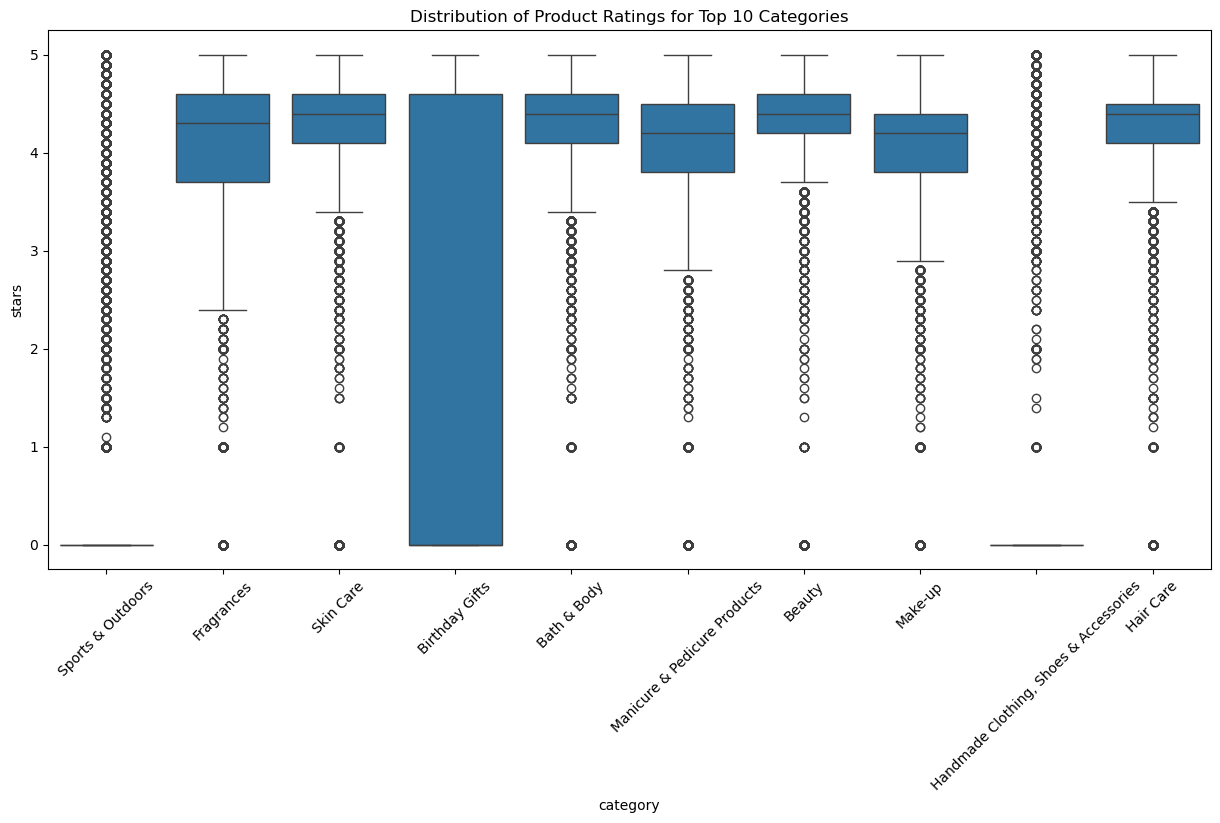

In [55]:
top_categories3 = df['category'].value_counts().nlargest(10).index
df_top2 = df[df['category'].isin(top_categories3)]

# Visualize with box plots
plt.figure(figsize=(15, 7))
sns.boxplot(x='category', y='stars', data=df_top2)
plt.title('Distribution of Product Ratings for Top 10 Categories')
plt.xticks(rotation=45)
plt.show()

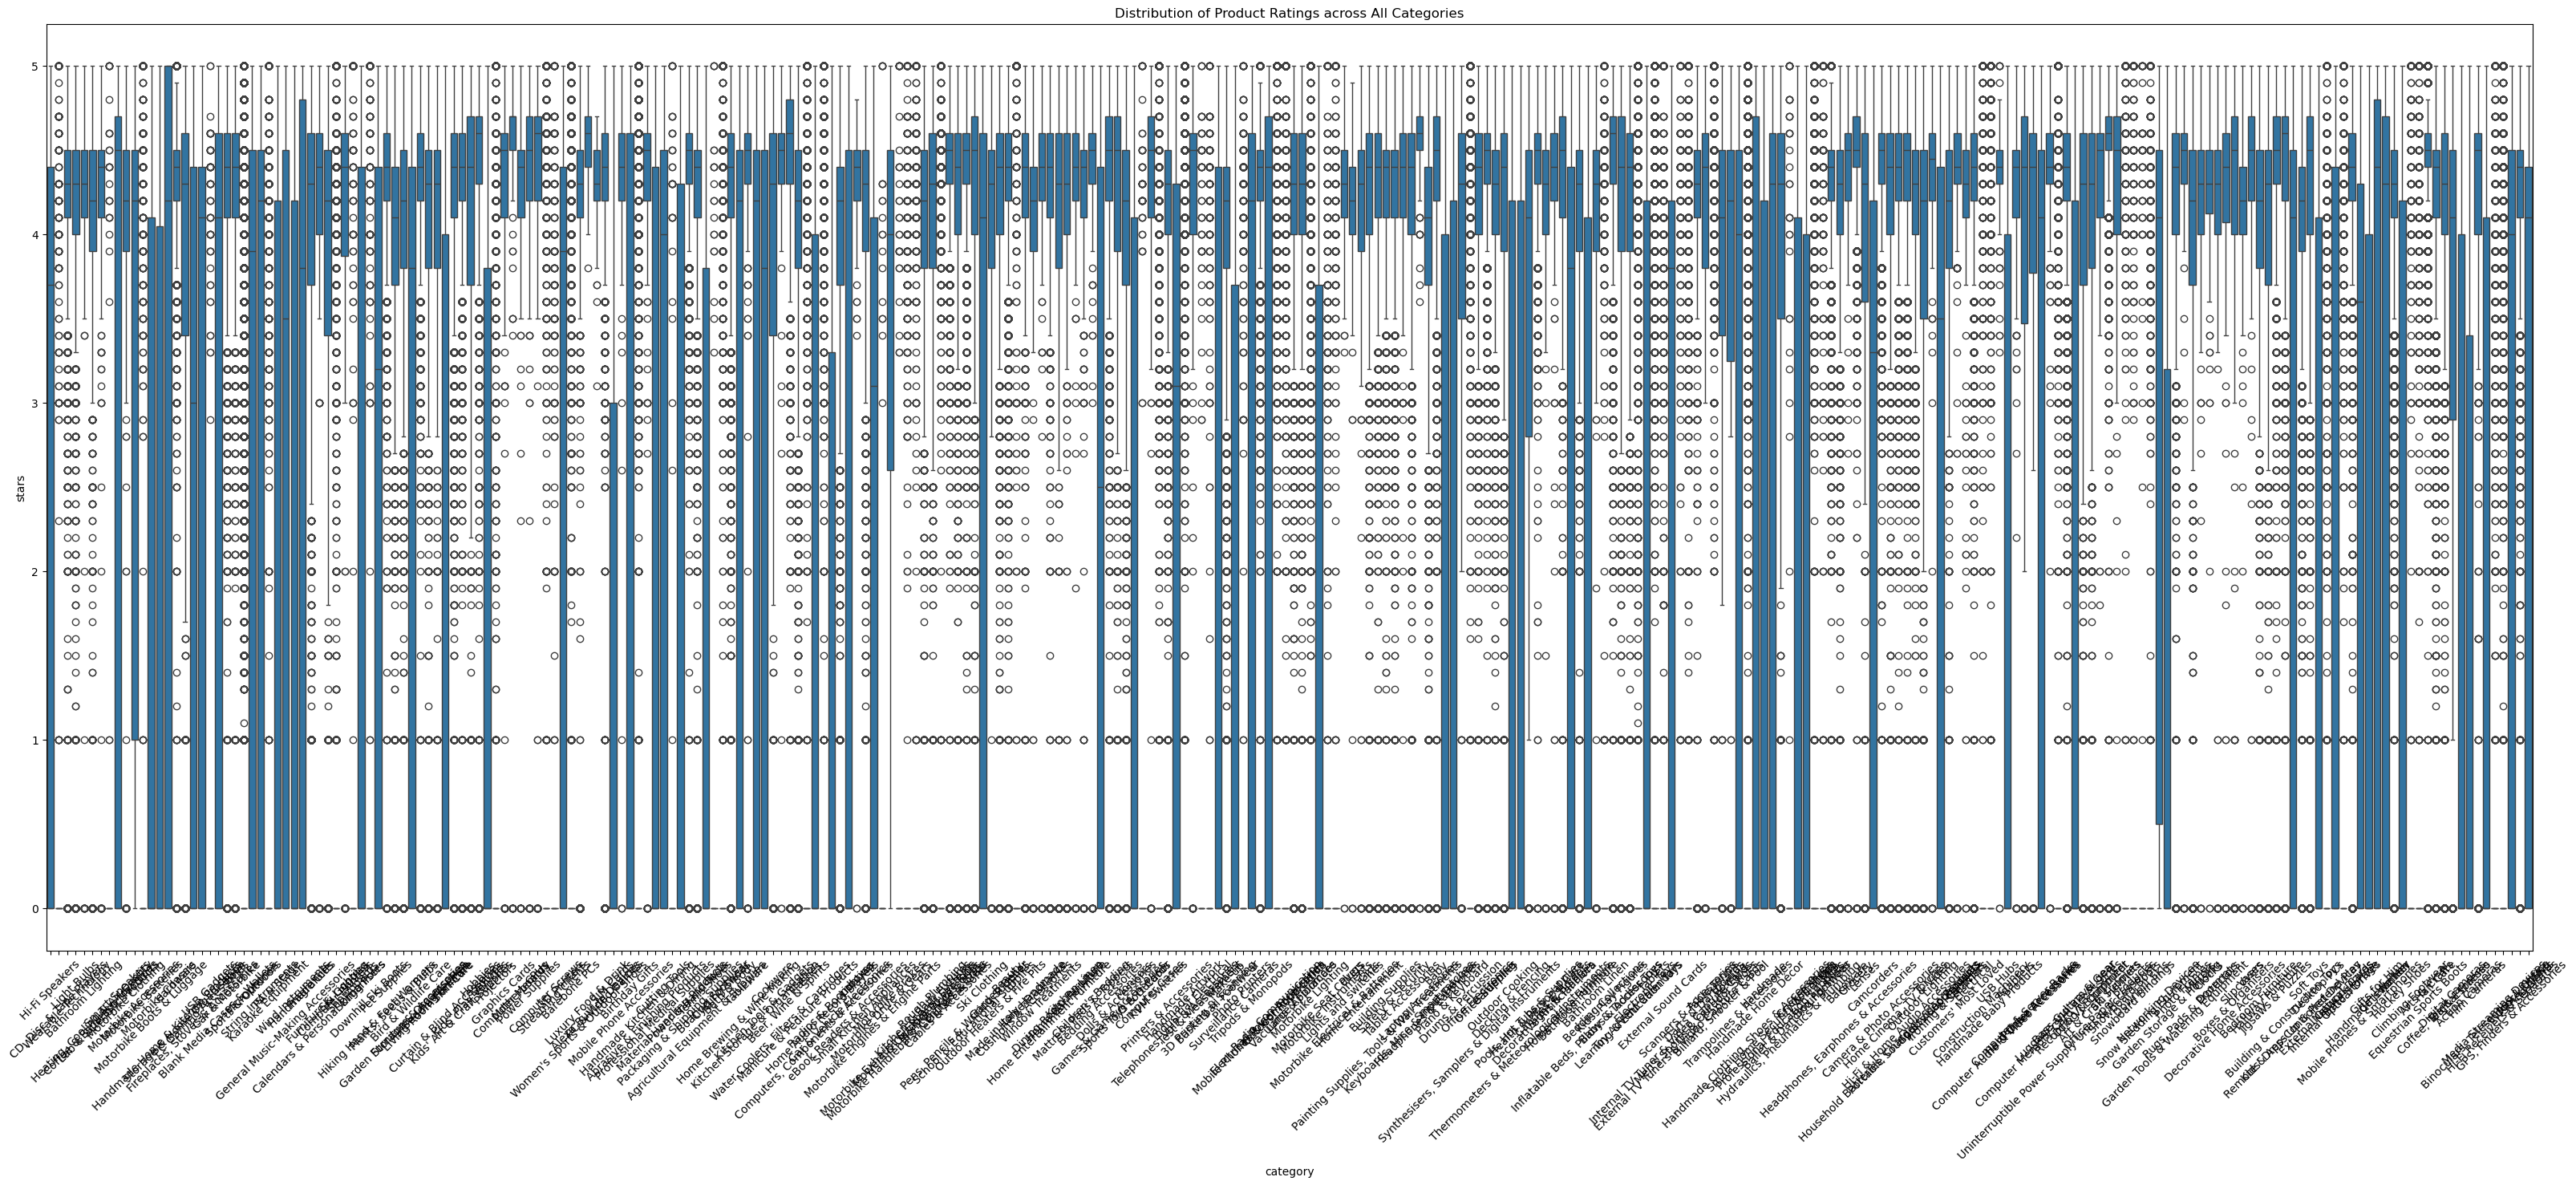

The category with the highest median rating is 'Computer Memory' with a median rating of 4.7.


In [57]:
plt.figure(figsize=(40, 15))
sns.boxplot(x='category', y='stars', data=df)
plt.title('Distribution of Product Ratings across All Categories')
plt.xticks(rotation=45)
plt.show()

# Determine the highest median rating category
median_ratings = df.groupby('category')['stars'].median()
highest_median_category = median_ratings.idxmax()
highest_median_value = median_ratings.max()

print(f"The category with the highest median rating is '{highest_median_category}' with a median rating of {highest_median_value}.")




In [58]:
correlation = df['price'].corr(df['stars'])
correlation

np.float64(-0.1249067326214861)

In [ ]:
# there is a weak negative correlation between price and rating (stars).That means that as the rpice increases, the rating tends to decrease. This could be due to higher expectations linked to higher prices.

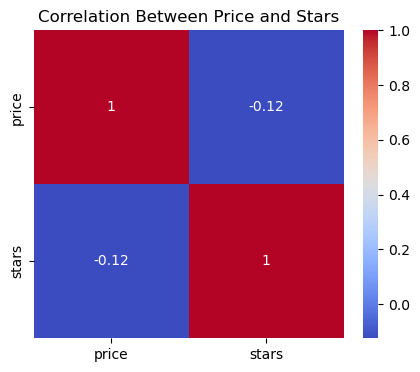

In [59]:
df_filtered2 = df[['price', 'stars']]

# Step 2: Calculate the correlation matrix for these two columns
correlation_matrix = df_filtered2.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Between Price and Stars")
plt.show()

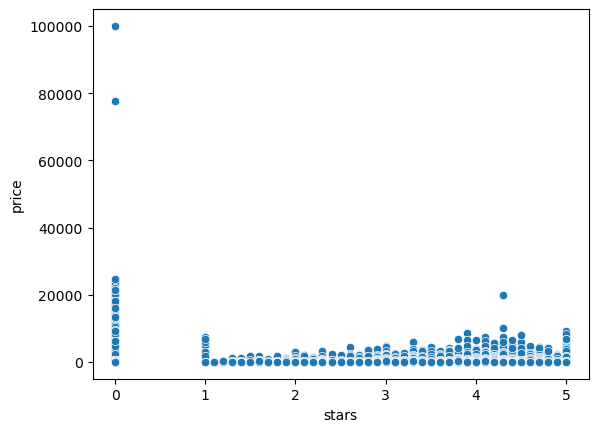

In [65]:
sns.scatterplot(data=df, x='stars', y='price')
plt.show()

In [66]:
#there are a couple of outliers with high price and rating zero. most products with rating zero are more towards the lower price.  There doesn´t seem to be a significant correlation between price and rating according to this plot.

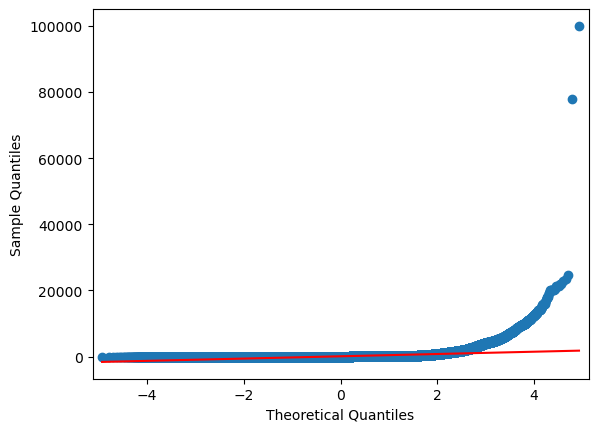

In [64]:
import statsmodels.api as sm
sm.qqplot(df['price'], line='s')
plt.show()